In [1]:
import logging

import graphcat.notebook
import imagecat.notebook

logging.basicConfig(level=logging.DEBUG)

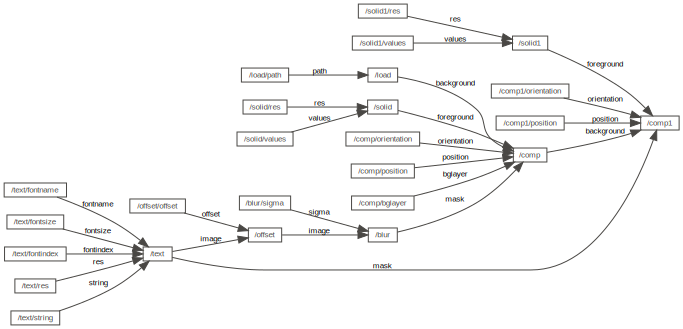

DEBUG:imagecat.io:{'srgb': 1, 'Artist': 'tshead', 'Comment': 'none'}
INFO:imagecat.operator:Task /load load:
INFO:imagecat.operator:  layers: *
INFO:imagecat.operator:  path: ../artwork/logo.png
INFO:imagecat.operator:  output: Image(C: Layer(Role.RGB 2560x1440x3 float16), A: Layer(Role.NONE 2560x1440x1 float16))
INFO:imagecat.operator.color:Task /solid fill:
INFO:imagecat.operator.color:  layer: C
INFO:imagecat.operator.color:  res: [500 200]
INFO:imagecat.operator.color:  role: Role.RGB
INFO:imagecat.operator.color:  values: [0 0 0]
INFO:imagecat.operator.color:  output: Image(C: Layer(Role.RGB 500x200x3 float16))
INFO:imagecat.operator.render:Task /text text:
INFO:imagecat.operator.render:  anchor: mm
INFO:imagecat.operator.render:  fontindex: 4
INFO:imagecat.operator.render:  fontname: HelveticaNeue
INFO:imagecat.operator.render:  fontsize: 96
INFO:imagecat.operator.render:  layer: A
INFO:imagecat.operator.render:  position: ('0.5w', '0.5h')
INFO:imagecat.operator.render:  res: [50

Accordion(children=(HTML(value=''),), _titles={'0': 'Layer: C'})

In [2]:
graph = graphcat.DynamicGraph()

text = imagecat.add_task(graph, "/text", imagecat.operator.render.text, fontname="HelveticaNeue", fontsize=96, fontindex=4, res=(500, 200), string="Imagecat!")
offset = imagecat.add_task(graph, "/offset", imagecat.operator.transform.offset, offset=("5px", "-6px"))
blur = imagecat.add_task(graph, "/blur", imagecat.operator.blur.gaussian, sigma="4px")
graph.add_links(text, (offset, "image"))
graph.add_links(offset, (blur, "image"))

load = imagecat.add_task(graph, "/load", imagecat.operator.load, path="../artwork/logo.png")

solid = imagecat.add_task(graph, "/solid", imagecat.operator.color.fill, res=(500, 200), values=[0, 0, 0])
comp = imagecat.add_task(graph, "/comp", imagecat.operator.transform.composite, orientation=30, position=("0.25w", "0.4h"), bglayer="C")
graph.set_links(solid, (comp, "foreground"))
graph.set_links(load, (comp, "background"))
graph.set_links(blur, (comp, "mask"))

solid = imagecat.add_task(graph, "/solid", imagecat.operator.color.fill, res=(500, 200), values=[1, 0.75, 0])
comp1 = imagecat.add_task(graph, "/comp", imagecat.operator.transform.composite, orientation=30, position=("0.25w", "0.4h"))
graph.set_links(solid, (comp1, "foreground"))
graph.set_links(comp, (comp1, "background"))
graph.add_links(text, (comp1, "mask"))

graphcat.notebook.display(graph)
imagecat.notebook.display(graph.output(comp1))


In [3]:
imagecat.notebook.display(graph.output("/text"))

Accordion(children=(HTML(value=''),), _titles={'0': 'Layer: A'})